# clean things up a bit

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os

VISUALIZE = True
input_train_file = "../resources/raw/train_bat_data.pkl"

with open(input_train_file, "rb") as file:
    train_dict = pickle.load(file)

input_val_file = "../resources/raw/val_bat_data.pkl"

with open(input_val_file, "rb") as file:
    val_dict = pickle.load(file)
    
loaded_dict = train_dict | val_dict
# type(loaded_dict['b1c1']['q_d_n'])

# Visualize

battery_id: dict_keys(['b1c1', 'b1c3', 'b1c5', 'b1c7', 'b1c11', 'b1c15', 'b1c17', 'b1c19', 'b1c21', 'b1c24', 'b1c26', 'b1c28', 'b1c30', 'b1c32', 'b1c34', 'b1c36', 'b1c38', 'b1c40', 'b1c42', 'b1c44', 'b2c0', 'b2c2', 'b2c4', 'b2c6', 'b2c11', 'b2c13', 'b2c17', 'b2c19', 'b2c21', 'b2c23', 'b2c25', 'b2c27', 'b2c29', 'b2c31', 'b2c33', 'b2c35', 'b2c37', 'b2c39', 'b2c41', 'b2c43', 'b2c45', 'b1c0', 'b1c2', 'b1c4', 'b1c6', 'b1c9', 'b1c14', 'b1c16', 'b1c18', 'b1c20', 'b1c23', 'b1c25', 'b1c27', 'b1c29', 'b1c31', 'b1c33', 'b1c35', 'b1c37', 'b1c39', 'b1c41', 'b1c43', 'b1c45', 'b2c1', 'b2c3', 'b2c5', 'b2c10', 'b2c12', 'b2c14', 'b2c18', 'b2c20', 'b2c22', 'b2c24', 'b2c26', 'b2c28', 'b2c30', 'b2c32', 'b2c34', 'b2c36', 'b2c38', 'b2c40', 'b2c42', 'b2c44', 'b2c46'])
sample_battery_id (b1c1): dict_keys(['q_d_n', 'cycle'])
normalized discharge capacity: [1.0499999523162842, 1.075301170349121, 1.0766123533248901, 1.0772981643676758, 1.0781505107879639, 1.078544020652771, 1.0789694786071777, 1.0793800354003906,

/tmp/ipykernel_16503/2074754399.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=10)


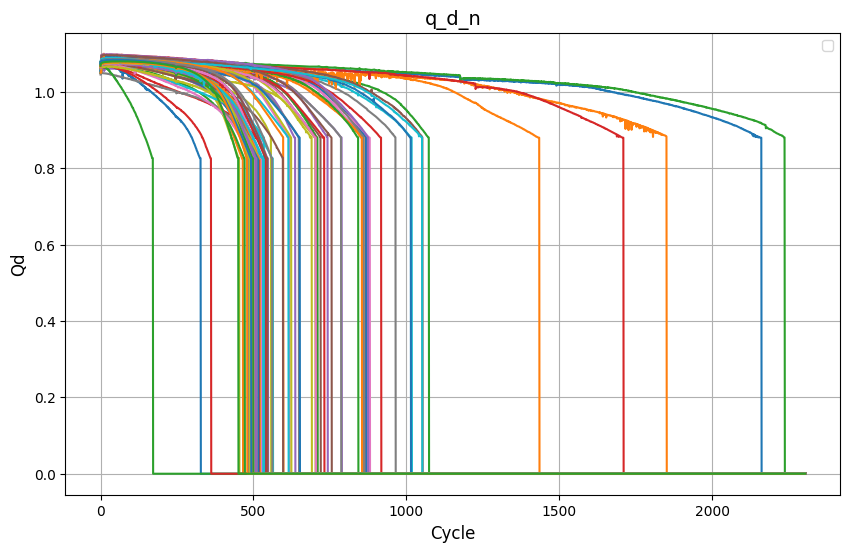

In [2]:
sample_battery_id = 'b1c1'
print("battery_id:", loaded_dict.keys())
print(f"sample_battery_id ({sample_battery_id}):" ,loaded_dict[sample_battery_id].keys())
print("normalized discharge capacity:" , loaded_dict['b1c1']['q_d_n'][:10])
print("cycle_life:" , loaded_dict['b1c1']['cycle'])

if VISUALIZE:
    # Plot the graph
    plt.figure(figsize=(10, 6))
    for cell_id in loaded_dict:
        x_values = list(range(2304))
        q_d_n_values  = loaded_dict[cell_id]['q_d_n']
        cycle = loaded_dict[cell_id]['cycle']
        # plt.plot(x_values, q_d_n_values, label=f'{cell_id}_{cycle}')
        plt.plot(x_values, q_d_n_values)

    # Add labels and title
    plt.xlabel('Cycle', fontsize=12)
    plt.ylabel('Qd', fontsize=12)
    plt.title('q_d_n', fontsize=14)

    # Add grid and legend
    plt.grid(True)
    plt.legend(fontsize=10)

    # Show the plot
    plt.show()

# Feature Engineering

In [3]:
print(loaded_dict['b1c1']['q_d_n'])
# save the output of this example to text file
output_file = "../resources/raw/output.txt"
with open(output_file, "w") as file:
    file.write(str(loaded_dict['b1c1']['q_d_n']))
    file.write("\n")



[1.0499999523162842, 1.075301170349121, 1.0766123533248901, 1.0772981643676758, 1.0781505107879639, 1.078544020652771, 1.0789694786071777, 1.0793800354003906, 1.0795894861221313, 1.079776644706726, 1.0800153017044067, 1.0845894813537598, 1.0823009014129639, 1.0819395780563354, 1.081835150718689, 1.0819742679595947, 1.0820032358169556, 1.0819748640060425, 1.0818729400634766, 1.0818581581115723, 1.0818721055984497, 1.0819226503372192, 1.0819178819656372, 1.0820436477661133, 1.0820176601409912, 1.0820863246917725, 1.0821022987365723, 1.0820186138153076, 1.0819743871688843, 1.081928014755249, 1.0819486379623413, 1.0819107294082642, 1.0819109678268433, 1.0819156169891357, 1.0819072723388672, 1.081823468208313, 1.081803321838379, 1.0817220211029053, 1.0817707777023315, 1.081763505935669, 1.0818428993225098, 1.0818408727645874, 1.081842303276062, 1.0819029808044434, 1.0819271802902222, 1.0817855596542358, 1.0818145275115967, 1.0818408727645874, 1.0818337202072144, 1.0817146301269531, 1.081685

# Save to resource

In [4]:
for battery_id, data in loaded_dict.items():
    q_d_n = data.get('q_d_n')
    if q_d_n is not None:
        try:
            with open(f"../resources/raw/{battery_id}.txt", "w") as f:
                for val in q_d_n:
                    f.write(f"{val},\n")
        except Exception as e:
            print(f"Error saving {battery_id}: {e}")
    else:
        print(f"Missing 'q_d_n' for {battery_id}")


## map charging_policy

In [5]:
battery_id_to_charging_policy = {'b1c0': '3.6C(80%)-3.6C',
 'b1c1': '3.6C(80%)-3.6C',
 'b1c2': '3.6C(80%)-3.6C',
 'b1c3': '4C(80%)-4C',
 'b1c4': '4C(80%)-4C',
 'b1c5': '4.4C(80%)-4.4C',
 'b1c6': '4.8C(80%)-4.8C',
 'b1c7': '4.8C(80%)-4.8C',
 'b1c9': '5.4C(40%)-3.6C',
 'b1c11': '5.4C(50%)-3C',
 'b1c14': '5.4C(60%)-3C',
 'b1c15': '5.4C(60%)-3C',
 'b1c16': '5.4C(60%)-3.6C',
 'b1c17': '5.4C(60%)-3.6C',
 'b1c18': '5.4C(70%)-3C',
 'b1c19': '5.4C(70%)-3C',
 'b1c20': '5.4C(80%)-5.4C',
 'b1c21': '5.4C(80%)-5.4C',
 'b1c23': '6C(30%)-3.6C',
 'b1c24': '6C(40%)-3C',
 'b1c25': '6C(40%)-3C',
 'b1c26': '6C(40%)-3.6C',
 'b1c27': '6C(40%)-3.6C',
 'b1c28': '6C(50%)-3C',
 'b1c29': '6C(50%)-3C',
 'b1c30': '6C(50%)-3.6C',
 'b1c31': '6C(50%)-3.6C',
 'b1c32': '6C(60%)-3C',
 'b1c33': '6C(60%)-3C',
 'b1c34': '7C(30%)-3.6C',
 'b1c35': '7C(30%)-3.6C',
 'b1c36': '7C(40%)-3C',
 'b1c37': '7C(40%)-3C',
 'b1c38': '7C(40%)-3.6C',
 'b1c39': '7C(40%)-3.6C',
 'b1c40': '8C(15%)-3.6C',
 'b1c41': '8C(15%)-3.6C',
 'b1c42': '8C(25%)-3.6C',
 'b1c43': '8C(25%)-3.6C',
 'b1c44': '8C(35%)-3.6C',
 'b1c45': '8C(35%)-3.6C',
 'b2c0': '1C(4%)-6C',
 'b2c1': '2C(10%)-6C',
 'b2c2': '2C(2%)-5C',
 'b2c3': '2C(7%)-5.5C',
 'b2c4': '3.6C(22%)-5.5C',
 'b2c5': '3.6C(2%)-4.85C',
 'b2c6': '3.6C(30%)-6C',
 'b2c10': '3.6C(9%)-5C',
 'b2c11': '4C(13%)-5C',
 'b2c12': '4C(31%)-5',
 'b2c13': '4C(40%)-6C',
 'b2c14': '4C(4%)-4.85C',
 'b2c17': '4.4C(24%)-5C',
 'b2c18': '4.4C(47%)-5.5C',
 'b2c19': '4.4C(55%)-6C',
 'b2c20': '4.4C(8%)-4.85C',
 'b2c21': '4.65C(19%)-4.85C',
 'b2c22': '4.65C(44%)-5C',
 'b2c23': '4.65C(69%)-6C',
 'b2c24': '4.8C(80%)-4.8C',
 'b2c25': '4.8C(80%)-4.8C',
 'b2c26': '4.8C(80%)-4.8C',
 'b2c27': '4.9C(27%)-4.75C',
 'b2c28': '4.9C(61%)-4.5C',
 'b2c29': '4.9C(69%)-4.25C',
 'b2c30': '5.2C(10%)-4.75C',
 'b2c31': '5.2C(37%)-4.5C',
 'b2c32': '5.2C(50%)-4.25C',
 'b2c33': '5.2C(58%)-4C',
 'b2c34': '5.2C(66%)-3.5C',
 'b2c35': '5.2C(71%)-3C',
 'b2c36': '5.6C(25%)-4.5C',
 'b2c37': '5.6C(38%)-4.25C',
 'b2c38': '5.6C(47%)-4C',
 'b2c39': '5.6C(58%)-3.5C',
 'b2c40': '5.6C(5%)-4.75C',
 'b2c41': '5.6C(65%)-3C',
 'b2c42': '6C(20%)-4.5C',
 'b2c43': '6C(31%)-4.25C',
 'b2c44': '6C(40%)-4C',
 'b2c45': '6C(4%)-4.75C',
 'b2c46': '6C(52%)-3.5C',
 'b2c47': '6C(60%)-3C',
 'b3c0': '5C(67%)-4C-newstructure',
 'b3c1': '5.3C(54%)-4C-newstructure',
 'b3c3': '5.6C(36%)-4.3C-newstructure',
 'b3c4': '5.6C(19%)-4.6C-newstructure',
 'b3c5': '5.6C(36%)-4.3C-newstructure',
 'b3c6': '3.7C(31%)-5.9C-newstructure',
 'b3c7': '4.8C(80%)-4.8C-newstructure',
 'b3c8': '5C(67%)-4C-newstructure',
 'b3c9': '5.3C(54%)-4C-newstructure',
 'b3c10': '4.8C(80%)-4.8C-newstructure',
 'b3c11': '5.6C(19%)-4.6C-newstructure',
 'b3c12': '5.6C(36%)-4.3C-newstructure',
 'b3c13': '5.6C(19%)-4.6C-newstructure',
 'b3c14': '5.6C(36%)-4.3C-newstructure',
 'b3c15': '5.9C(15%)-4.6C-newstructure',
 'b3c16': '4.8C(80%)-4.8C-newstructure',
 'b3c17': '5.3C(54%)-4C-newstructure',
 'b3c18': '5.6C(19%)-4.6C-newstructure',
 'b3c19': '5.6C(36%)-4.3C-newstructure',
 'b3c20': '5C(67%)-4C-newstructure',
 'b3c21': '3.7C(31%)-5.9C-newstructure',
 'b3c22': '5.9C(60%)-3.1C-newstructure',
 'b3c24': '5C(67%)-4C-newstructure',
 'b3c25': '5.3C(54%)-4C-newstructure',
 'b3c26': '5.6C(19%)-4.6C-newstructure',
 'b3c27': '5.6C(36%)-4.3C-newstructure',
 'b3c28': '3.7C(31%)-5.9C-newstructure',
 'b3c29': '5.9C(15%)-4.6C-newstructure',
 'b3c30': '5.3C(54%)-4C-newstructure',
 'b3c31': '5.9C(60%)-3.1C-newstructure',
 'b3c33': '5C(67%)-4C-newstructure',
 'b3c34': '5.3C(54%)-4C-newstructure',
 'b3c35': '5.6C(19%)-4.6C-newstructure',
 'b3c36': '5.6C(36%)-4.3C-newstructure',
 'b3c38': '5C(67%)-4C-newstructure',
 'b3c39': '5.3C(54%)-4C-newstructure',
 'b3c40': '5.6C(19%)-4.6C-newstructure',
 'b3c41': '5.6C(36%)-4.3C-newstructure',
 'b3c44': '5.3C(54%)-4C-newstructure',
 'b3c45': '4.8C(80%)-4.8C-newstructure'
}

# add key to the dictionary
for battery_id in loaded_dict:
    if battery_id in battery_id_to_charging_policy:
        loaded_dict[battery_id]['charging_policy'] = battery_id_to_charging_policy[battery_id]
    else:
        loaded_dict[battery_id]['charging_policy'] = 'unknown'
        print(f"battery_id {battery_id} not found in battery_id_to_charging_policy")

## trimmed_q_d_n

In [6]:
for bat in loaded_dict:
    trimmed_arr = np.trim_zeros(loaded_dict[bat]['q_d_n'], 'b')
    loaded_dict[bat]['trimmed_q_d_n'] = list(trimmed_arr)
    
for bat in loaded_dict:
    # print("trimmed_q_d_n length:", len(loaded_dict[bat]['trimmed_q_d_n']))    
    # print("cycle_life:", loaded_dict[bat]['cycle'])
    assert len(loaded_dict[bat]['trimmed_q_d_n']) == loaded_dict[bat]['cycle'], f"battery {bat} has different length of trimmed_q_d_n and cycle_life"

## Slope feature
- Last k-th Cycle Slope:	Measures degradation trend over different periods
- Beginning-to-End Slope:	Captures long-term degradation rate

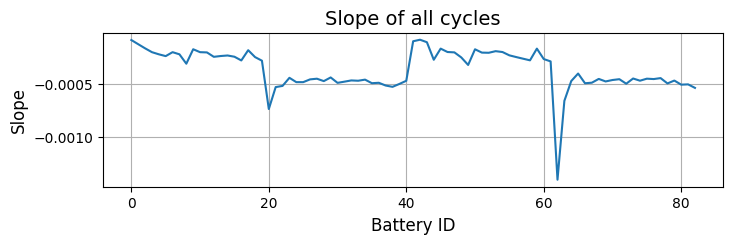

In [7]:
last_k_th_cycles_list = [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# calculate slope from first cycle to the last cycle
for battery_id in loaded_dict:
    q_d_n_values  = loaded_dict[battery_id]['trimmed_q_d_n']
    cycle = loaded_dict[battery_id]['cycle']
    slope = (q_d_n_values[-1] - q_d_n_values[0]) / cycle
    loaded_dict[battery_id]['slope_all_cycles'] = slope

#visualize the slope line plot for all batteries
if VISUALIZE:
    slope_values = [loaded_dict[bat]['slope_all_cycles'] for bat in loaded_dict]
    plt.figure(figsize=(8, 2))
    plt.plot(slope_values)
    plt.xlabel('Battery ID', fontsize=12)
    plt.ylabel('Slope', fontsize=12)
    plt.title('Slope of all cycles', fontsize=14)
    plt.grid(True)
    plt.show()

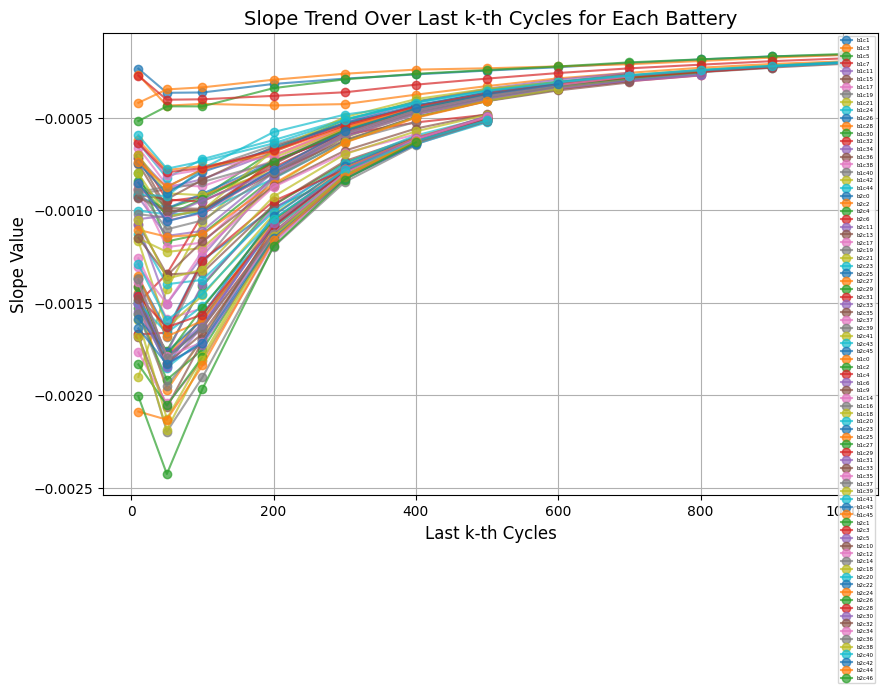

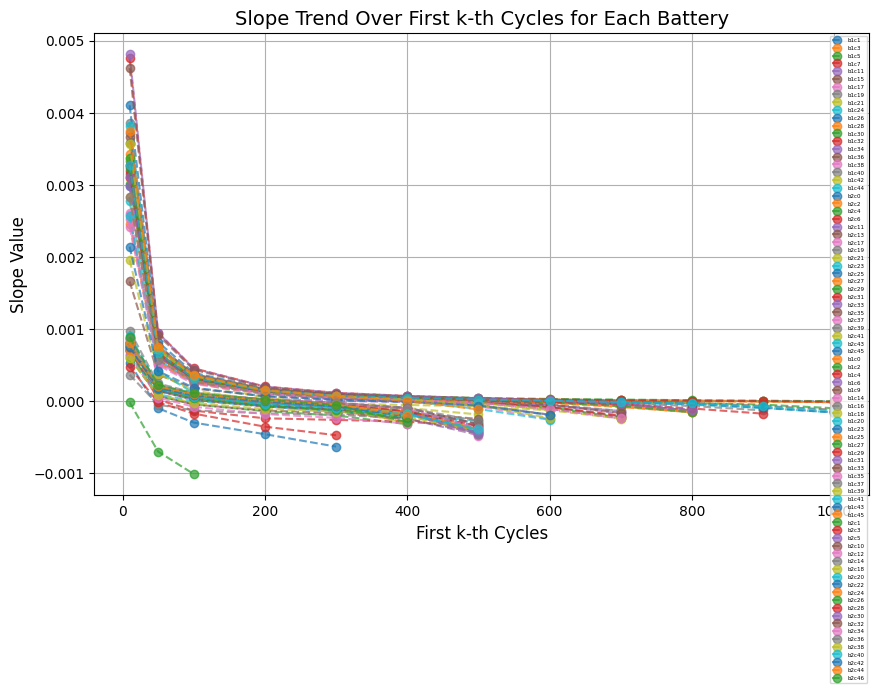

In [8]:
last_k_th_cycles_list = [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
first_k_th_cycles_list = last_k_th_cycles_list  # assuming same values

# Calculate slope of the last k cycles
for k in last_k_th_cycles_list:
    for battery_id in loaded_dict:
        q_d_n_values  = loaded_dict[battery_id]['trimmed_q_d_n']
        cycle = loaded_dict[battery_id]['cycle']
        if cycle > k:
            slope = (q_d_n_values[-1] - q_d_n_values[-k]) / k
        else:
            slope = np.nan
        loaded_dict[battery_id][f'slope_last_{k}_cycles'] = slope

# Calculate slope of the first k cycles
for k in first_k_th_cycles_list:
    for battery_id in loaded_dict:
        q_d_n_values  = loaded_dict[battery_id]['trimmed_q_d_n']
        cycle = loaded_dict[battery_id]['cycle']
        if cycle > k:
            slope = (q_d_n_values[k - 1] - q_d_n_values[0]) / k
        else:
            slope = np.nan
        loaded_dict[battery_id][f'slope_first_{k}_cycles'] = slope

# Visualization
if VISUALIZE:
    # Last k cycles
    plt.figure(figsize=(10, 6))
    for battery_id in loaded_dict:
        slope_values = [
            loaded_dict[battery_id].get(f'slope_last_{k}_cycles', None)
            for k in last_k_th_cycles_list
        ]
        plt.plot(last_k_th_cycles_list, slope_values, marker='o', linestyle='-', label=battery_id, alpha=0.7)

    plt.xlabel('Last k-th Cycles', fontsize=12)
    plt.ylabel('Slope Value', fontsize=12)
    plt.title('Slope Trend Over Last k-th Cycles for Each Battery', fontsize=14)
    plt.legend(loc='best', fontsize=4)
    plt.grid(True)
    plt.show()

    # First k cycles
    plt.figure(figsize=(10, 6))
    for battery_id in loaded_dict:
        slope_values = [
            loaded_dict[battery_id].get(f'slope_first_{k}_cycles', None)
            for k in first_k_th_cycles_list
        ]
        plt.plot(first_k_th_cycles_list, slope_values, marker='o', linestyle='--', label=battery_id, alpha=0.7)

    plt.xlabel('First k-th Cycles', fontsize=12)
    plt.ylabel('Slope Value', fontsize=12)
    plt.title('Slope Trend Over First k-th Cycles for Each Battery', fontsize=14)
    plt.legend(loc='best', fontsize=4)
    plt.grid(True)
    plt.show()


## mean gradient
- mean gradient of the last k-th cycles

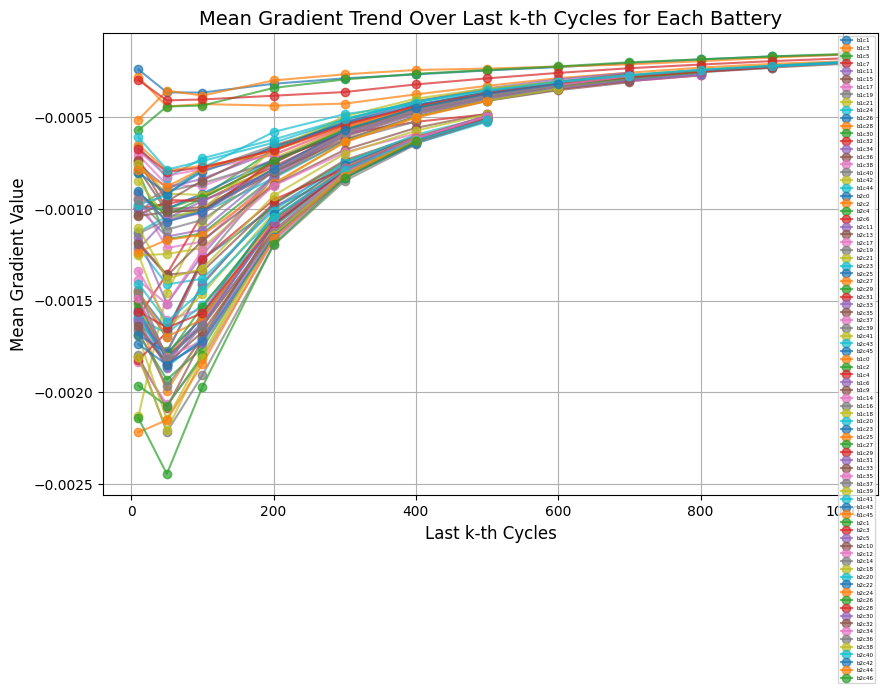

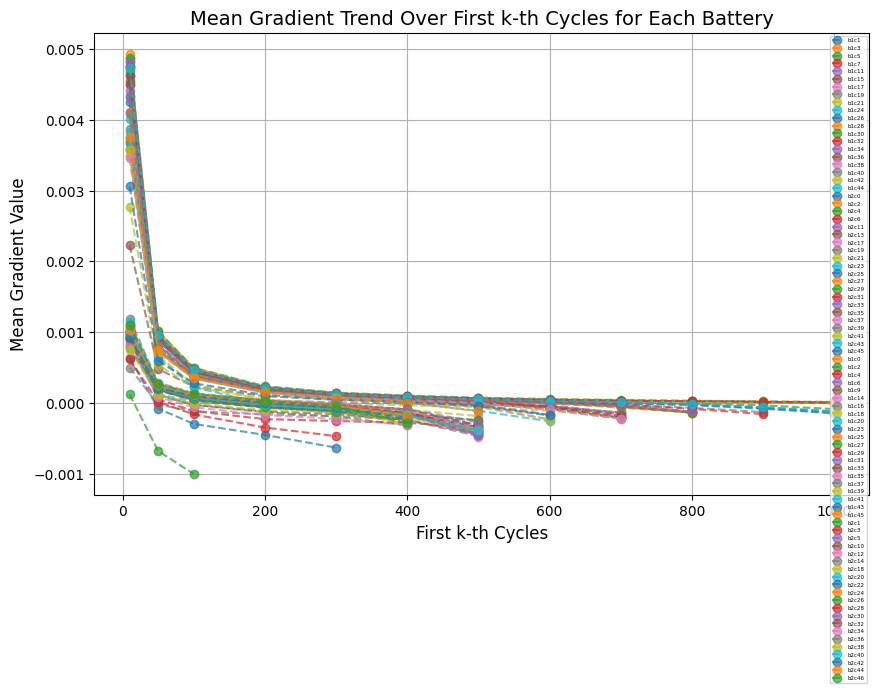

In [9]:
last_k_th_cycles_list = [10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
first_k_th_cycles_list = last_k_th_cycles_list  # reuse same list

# Calculate mean gradient of the last k cycles
for k in last_k_th_cycles_list:
    for battery_id in loaded_dict:
        q_d_n_values = loaded_dict[battery_id]['trimmed_q_d_n']
        cycle = loaded_dict[battery_id]['cycle']
        if cycle > k:
            slope = np.gradient(q_d_n_values[-k:], 1)
            mean_slope = np.mean(slope)
        else:
            mean_slope = np.nan
        loaded_dict[battery_id][f'mean_grad_last_{k}_cycles'] = mean_slope

# Calculate mean gradient of the first k cycles
for k in first_k_th_cycles_list:
    for battery_id in loaded_dict:
        q_d_n_values = loaded_dict[battery_id]['trimmed_q_d_n']
        cycle = loaded_dict[battery_id]['cycle']
        if cycle > k:
            slope = np.gradient(q_d_n_values[:k], 1)
            mean_slope = np.mean(slope)
        else:
            mean_slope = np.nan
        loaded_dict[battery_id][f'mean_grad_first_{k}_cycles'] = mean_slope

# Visualize mean gradient of last k cycles
if VISUALIZE:
    plt.figure(figsize=(10, 6))
    for battery_id in loaded_dict:
        mean_slope_values = [
            loaded_dict[battery_id].get(f'mean_grad_last_{k}_cycles', None)
            for k in last_k_th_cycles_list
        ]
        plt.plot(last_k_th_cycles_list, mean_slope_values, marker='o', linestyle='-', label=battery_id, alpha=0.7)

    plt.xlabel('Last k-th Cycles', fontsize=12)
    plt.ylabel('Mean Gradient Value', fontsize=12)
    plt.title('Mean Gradient Trend Over Last k-th Cycles for Each Battery', fontsize=14)
    plt.legend(loc='best', fontsize=4)
    plt.grid(True)
    plt.show()

    # Visualize mean gradient of first k cycles
    plt.figure(figsize=(10, 6))
    for battery_id in loaded_dict:
        mean_slope_values = [
            loaded_dict[battery_id].get(f'mean_grad_first_{k}_cycles', None)
            for k in first_k_th_cycles_list
        ]
        plt.plot(first_k_th_cycles_list, mean_slope_values, marker='o', linestyle='--', label=battery_id, alpha=0.7)

    plt.xlabel('First k-th Cycles', fontsize=12)
    plt.ylabel('Mean Gradient Value', fontsize=12)
    plt.title('Mean Gradient Trend Over First k-th Cycles for Each Battery', fontsize=14)
    plt.legend(loc='best', fontsize=4)
    plt.grid(True)
    plt.show()


## Clean up and check validity

In [10]:
#check each keys in the dictionary
sample_battery_id = 'b1c1'
print("battery_id:", loaded_dict.keys())
features = loaded_dict[sample_battery_id].keys()
print(f"sample_battery_id ({sample_battery_id}) features:")
for feature in features:
    print(f'    -{feature} : ({type(loaded_dict[sample_battery_id][feature])}) Example: {loaded_dict[sample_battery_id][feature]}')

battery_id: dict_keys(['b1c1', 'b1c3', 'b1c5', 'b1c7', 'b1c11', 'b1c15', 'b1c17', 'b1c19', 'b1c21', 'b1c24', 'b1c26', 'b1c28', 'b1c30', 'b1c32', 'b1c34', 'b1c36', 'b1c38', 'b1c40', 'b1c42', 'b1c44', 'b2c0', 'b2c2', 'b2c4', 'b2c6', 'b2c11', 'b2c13', 'b2c17', 'b2c19', 'b2c21', 'b2c23', 'b2c25', 'b2c27', 'b2c29', 'b2c31', 'b2c33', 'b2c35', 'b2c37', 'b2c39', 'b2c41', 'b2c43', 'b2c45', 'b1c0', 'b1c2', 'b1c4', 'b1c6', 'b1c9', 'b1c14', 'b1c16', 'b1c18', 'b1c20', 'b1c23', 'b1c25', 'b1c27', 'b1c29', 'b1c31', 'b1c33', 'b1c35', 'b1c37', 'b1c39', 'b1c41', 'b1c43', 'b1c45', 'b2c1', 'b2c3', 'b2c5', 'b2c10', 'b2c12', 'b2c14', 'b2c18', 'b2c20', 'b2c22', 'b2c24', 'b2c26', 'b2c28', 'b2c30', 'b2c32', 'b2c34', 'b2c36', 'b2c38', 'b2c40', 'b2c42', 'b2c44', 'b2c46'])
sample_battery_id (b1c1) features:
    -q_d_n : (<class 'list'>) Example: [1.0499999523162842, 1.075301170349121, 1.0766123533248901, 1.0772981643676758, 1.0781505107879639, 1.078544020652771, 1.0789694786071777, 1.0793800354003906, 1.0795894861

# Export as pkl

In [11]:
# export as pickle file
output_file = "../resources/processed/processed_for_kg_v2.pkl"
with open(output_file, "wb") as file:
    pickle.dump(loaded_dict, file)
print(f"processed data is saved at {output_file}")

processed data is saved at ../resources/processed/processed_for_kg_v2.pkl
